## Import Pandas Module and Data Set

In [8]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
hotel_df = pd.read_csv('./hotel_booking.csv')

# After reading the first line, I feel like we don't need those columns
hotel_df = hotel_df.drop(['name','email','phone-number', 'credit_card','agent'], axis=1)

# Combine the date columns into 1 and convert to datetime
hotel_df['arrival_date_whole'] = pd.to_datetime(hotel_df['arrival_date_year'].astype(str)+hotel_df['arrival_date_month']+hotel_df['arrival_date_day_of_month'].astype(str), 
                                               format='%Y%B%d')
# Print out the first line
hotel_df.iloc[0]

hotel                                    Resort Hotel
is_canceled                                         0
lead_time                                         342
arrival_date_year                                2015
arrival_date_month                               July
arrival_date_week_number                           27
arrival_date_day_of_month                           1
stays_in_weekend_nights                             0
stays_in_week_nights                                0
adults                                              2
children                                          0.0
babies                                              0
meal                                               BB
country                                           PRT
market_segment                                 Direct
distribution_channel                           Direct
is_repeated_guest                                   0
previous_cancellations                              0
previous_bookings_not_cancel

## Data Exploration

In [3]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [15]:
# Look at the unqiue values for each column
for col in hotel_df.columns:
    print(col)
    print(hotel_df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
is_canceled
[0 1]
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194

(array([40060.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 79330.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

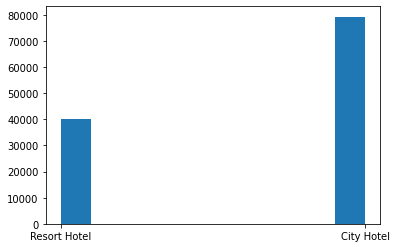

In [10]:
hist(hotel_df['hotel'])

In [13]:
hotel_df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [14]:
hotel_df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [22]:
hotel_df.groupby('hotel')['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64

In [24]:
pd.pivot_table(index='hotel', columns='is_canceled', values='lead_time', data=hotel_df, aggfunc='count')

is_canceled,0,1
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122


In [26]:
pd.pivot_table(index=['hotel','is_repeated_guest'], columns='is_canceled', values='lead_time', data=hotel_df, aggfunc='count')

is_canceled                         0      1
hotel        is_repeated_guest              
City Hotel   0                  44637  32661
             1                   1591    441
Resort Hotel 0                  27271  11011
             1                   1667    111

In [25]:
pd.pivot_table(index='market_segment', columns='is_canceled', values='lead_time', data=hotel_df, aggfunc='count')

is_canceled,0,1
market_segment,,
Aviation,185.0,52.0
Complementary,646.0,97.0
Corporate,4303.0,992.0
Direct,10672.0,1934.0
Groups,7714.0,12097.0
Offline TA/TO,15908.0,8311.0
Online TA,35738.0,20739.0
Undefined,NaN,2.0


Groups and OTA channel have extremely high cancellation rate.

In [27]:
pd.pivot_table(index=['market_segment','is_repeated_guest'], columns='is_canceled', values='lead_time', data=hotel_df, aggfunc='count')

is_canceled                             0        1
market_segment is_repeated_guest                  
Aviation       0                    132.0     41.0
               1                     53.0     11.0
Complementary  0                    435.0     78.0
               1                    211.0     19.0
Corporate      0                   2924.0    897.0
               1                   1379.0     95.0
Direct         0                   9933.0   1877.0
               1                    739.0     57.0
Groups         0                   7668.0  11873.0
               1                     46.0    224.0
Offline TA/TO  0                  15624.0   8216.0
               1                    284.0     95.0
Online TA      0                  35192.0  20688.0
               1                    546.0     51.0
Undefined      0                      NaN      2.0

In [28]:
pd.pivot_table(index='children', columns='is_canceled', values='lead_time', data=hotel_df, aggfunc='count') 

is_canceled,0,1
children,,
0.0,69702.0,41094.0
1.0,3294.0,1567.0
2.0,2111.0,1541.0
3.0,59.0,17.0
10.0,NaN,1.0


In [31]:
hotel_df.groupby('is_canceled')['lead_time'].mean()

is_canceled
0     79.984687
1    144.848815
Name: lead_time, dtype: float64

In [32]:
hotel_df.groupby(['hotel','is_canceled'])['lead_time'].mean()

hotel         is_canceled
City Hotel    0               80.702734
              1              150.281222
Resort Hotel  0               78.837618
              1              128.680543
Name: lead_time, dtype: float64

In [45]:
month_cancel = pd.pivot_table(index='is_canceled', columns='arrival_date_month', values='lead_time', data=hotel_df, aggfunc='count') 

In [43]:
month_cancel/month_cancel.apply(sum)

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
is_canceled,,,,,,,,,,,,
0,0.592028,0.622469,0.650295,0.66584,0.695227,0.625464,0.585428,0.678477,0.603342,0.687666,0.619534,0.608298
1,0.407972,0.377531,0.349705,0.33416,0.304773,0.374536,0.414572,0.321523,0.396658,0.312334,0.380466,0.391702


In [46]:
pd.pivot_table(index='is_canceled', columns='customer_type', values='lead_time', data=hotel_df, aggfunc='count') 

customer_type,Contract,Group,Transient,Transient-Party
is_canceled,,,,
0,2814,518,53099,18735
1,1262,59,36514,6389


In [52]:
sum(hotel_df[hotel_df['reserved_room_type'] != hotel_df['assigned_room_type']]['is_canceled'] != 0)

802

In [53]:
pd.pivot_table(index='is_canceled', columns='deposit_type', values='lead_time', data=hotel_df, aggfunc='count') 

deposit_type,No Deposit,Non Refund,Refundable
is_canceled,,,
0,74947,93,126
1,29694,14494,36


In [55]:
pd.pivot_table(index='is_canceled', columns='booking_changes', values='lead_time', data=hotel_df, aggfunc='count') 

booking_changes,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,20,21
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,59923.0,10894.0,3039.0,783.0,309.0,98.0,45.0,28.0,13.0,7.0,...,2.0,2.0,5.0,4.0,3.0,1.0,2.0,1.0,1.0,1.0
1,41391.0,1807.0,766.0,144.0,67.0,20.0,18.0,3.0,4.0,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN


## Create a new data frame for fit and prediction

In [83]:
new_hotel = hotel_df[['hotel', 'is_canceled', 'arrival_date_whole','market_segment','customer_type','deposit_type','booking_changes','lead_time','is_repeated_guest']].copy()
new_hotel.iloc[0]

hotel                        Resort Hotel
is_canceled                             0
arrival_date_whole    2015-07-01 00:00:00
market_segment                     Direct
customer_type                   Transient
deposit_type                   No Deposit
booking_changes                         3
lead_time                             342
is_repeated_guest                       0
Name: 0, dtype: object

## Date Preprocessing

In [84]:
new_hotel['hotel'] = new_hotel['hotel'].map(lambda x: 1 if x=='Resort Hotel' else 0)
new_hotel['arrival_month'] = pd.DatetimeIndex(new_hotel['arrival_date_whole']).month
new_hotel['arrival_year'] = pd.DatetimeIndex(new_hotel['arrival_date_whole']).year

In [85]:
# Create dummy columns for the categorical columns
deposit = pd.get_dummies(new_hotel['deposit_type'])
market = pd.get_dummies(new_hotel['market_segment'])
customer = pd.get_dummies(new_hotel['customer_type'])
new_hotel = pd.concat([new_hotel, deposit,market,customer], axis=1)
new_hotel.head()

,hotel,is_canceled,arrival_date_whole,market_segment,customer_type,deposit_type,booking_changes,lead_time,is_repeated_guest,arrival_month,...,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined,Contract,Group,Transient,Transient-Party
0,1,0,2015-07-01,Direct,Transient,No Deposit,3,342,0,7,...,0,1,0,0,0,0,0,0,1,0
1,1,0,2015-07-01,Direct,Transient,No Deposit,4,737,0,7,...,0,1,0,0,0,0,0,0,1,0
2,1,0,2015-07-01,Direct,Transient,No Deposit,0,7,0,7,...,0,1,0,0,0,0,0,0,1,0
3,1,0,2015-07-01,Corporate,Transient,No Deposit,0,13,0,7,...,1,0,0,0,0,0,0,0,1,0
4,1,0,2015-07-01,Online TA,Transient,No Deposit,0,14,0,7,...,0,0,0,0,1,0,0,0,1,0


In [86]:
# Drop the columns
new_hotel.drop(['arrival_date_whole', 'market_segment', 'customer_type', 'deposit_type'], axis=1, inplace=True)
new_hotel.head()

,hotel,is_canceled,booking_changes,lead_time,is_repeated_guest,arrival_month,arrival_year,No Deposit,Non Refund,Refundable,...,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined,Contract,Group,Transient,Transient-Party
0,1,0,3,342,0,7,2015,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,4,737,0,7,2015,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,7,0,7,2015,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,13,0,7,2015,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,14,0,7,2015,1,0,0,...,0,0,0,0,1,0,0,0,1,0


## Train and Test data split

In [87]:
from sklearn.model_selection import train_test_split
X = new_hotel.copy().drop('is_canceled',axis=1)
y = new_hotel['is_canceled'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## KNN Classification

from sklearn.neighbors import KNeighborsClassifier
training_acc = []
test_acc = []
setting = range(1,11)
for i in setting:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    training_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))
plot(setting, training_acc, label='training accuracy')
plot(setting, test_acc, label='test_accuracy')
legend()
show()

In [90]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7639026371227696

In [93]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7710601791923652

## Linear Regression

In [92]:
import statsmodels.api as sm
model = sm.OLS(y, X)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            is_canceled   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     2715.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:49:54   Log-Likelihood:                -62014.
No. Observations:              119390   AIC:                         1.241e+05
Df Residuals:                  119371   BIC:                         1.242e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
hotel                -0.0341      0.003    -13.201      0.000      -0.039      -0.029
booking_changes      -0.0591      0.002    -32.110      0.000      -0.063      -0.056
lead_time             0.0007   1.32e-05     50.200      0.000       0.001       0.001
is_repeated_guest    -0.0567      0.007     -7.870      0.000      -0.071      -0.043
arrival_month         0.0001      0.000      0.303      0.762      -0.001       0.001
arrival_year          0.0009      0.002      0.414      0.679      -0.003       0.005
No Deposit           -0.8153      1.995     -0.409      0.683      -4.725       3.095
Non Refund           -0.1704      1.994     -0.085      0.932      -4.079       3.739
Refundable           -0.8228      1.995     -0.412      0.680      -4.733       3.087
Aviation             -0.3011      0.750     -0.402      0.688      -1.770       1.168
Complementary        -0.3815      0.749     -0.510      0.610      -1.849       1.086
Corporate            -0.3520      0.749     -0.470      0.638      -1.819       1.116
Direct               -0.3827      0.749     -0.511      0.609      -1.850       1.085
Groups               -0.3047      0.748     -0.407      0.684      -1.772       1.162
Offline TA/TO        -0.3830      0.749     -0.512      0.609      -1.850       1.084
Online TA            -0.2121      0.749     -0.283      0.777      -1.680       1.256
Undefined             0.5086      0.790      0.644      0.520      -1.040       2.057
Contract             -0.4803      1.495     -0.321      0.748      -3.411       2.451
Group                -0.4964      1.496     -0.332      0.740      -3.429       2.436
Transient            -0.3847      1.496     -0.257      0.797      -3.318       2.548
Transient-Party      -0.4471      1.496     -0.299      0.765      -3.379       2.485
==============================================================================
Omnibus:                    18168.354   Durbin-Watson:                   0.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18154.804
Skew:                           0.888   Prob(JB):                         0.00
Kurtosis:                       2.297   Cond. No.                     1.38e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.55e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

cdf = pd.DataFrame(lr.coef_.T, X.columns, columns=['Coefficients'])
print(cdf.sort_values(by='Coefficients'))

0.7598162389908373
                   Coefficients
No Deposit            -2.085603
Direct                -0.581211
Offline TA/TO         -0.488214
booking_changes       -0.407791
Transient-Party       -0.379345
is_repeated_guest     -0.268958
hotel                 -0.236738
Corporate             -0.170436
Contract              -0.107183
Complementary         -0.059746
Group                 -0.048130
Refundable            -0.035732
Aviation              -0.005607
arrival_year           0.000165
Undefined              0.002202
arrival_month          0.002949
lead_time              0.004573
Online TA              0.473291
Transient              0.534897
Groups                 0.829959
Non Refund             2.121574


c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

0.7780908144876774


booking_changes      0.348458
No Deposit           0.339702
is_repeated_guest    0.112110
arrival_month        0.049495
Offline TA/TO        0.043373
is_canceled          0.027248
hotel                0.026325
Transient            0.016466
Direct               0.009377
lead_time            0.004638
Groups               0.004388
Group                0.004309
Corporate            0.003792
Complementary        0.003255
Undefined            0.003186
Aviation             0.001490
Contract             0.001188
arrival_year         0.000473
Refundable           0.000434
Non Refund           0.000233
Online TA            0.000058
dtype: float64

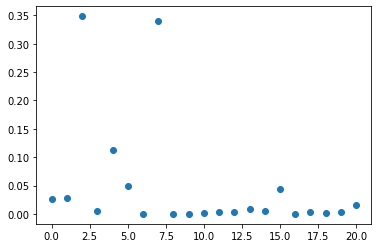

In [113]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print(tree.score(X_test, y_test))
plot(tree.feature_importances_, 'o')
dict={}
for k, v in zip(new_hotel.columns,tree.feature_importances_):
    dict[k] = v
pd.Series(dict).sort_values(ascending=False)